<a href="https://colab.research.google.com/github/BanuTK/Regression/blob/main/regression_model_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json
# For competition datasets
#!kaggle competitions download -c hellbuoy/car-price-prediction -p "/content/drive/MyDrive/Colab Notebooks"
# For other datasets
!kaggle datasets download -d hellbuoy/car-price-prediction -p "/content/drive/MyDrive/Colab Notebooks"

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-epf4jkcm/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-epf4jkcm/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-xjcor6y4/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.
{"username":"banutk","key":"5577fd8fb0239c102f798610d86af5d7"}car-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
! unzip "/content/drive/MyDrive/Colab Notebooks/car-price-prediction.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [21]:
df=pd.read_csv('CarPrice_Assignment.csv', sep=',')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

NameError: ignored

In [ ]:
df.shape

(205, 26)

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df['Company']= df['CarName'].apply(lambda x: x.split(" ")[0])
df['Company']= df['Company'].apply(lambda x: x.lower())

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['Company'].replace({'maxda': 'mazda', 'alfa-romero': 'alfa-romeo', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}, inplace=True)

In [ ]:
df.Company.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189
Company 22


In [ ]:
df = df[~df.duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cat_cols= [col for col in df.columns if df[col].dtype=='object']
num_cols= [col for col in df.columns if df[col].dtype!='object']

In [ ]:
num_cols.remove('price')
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Company'],
      dtype='object')

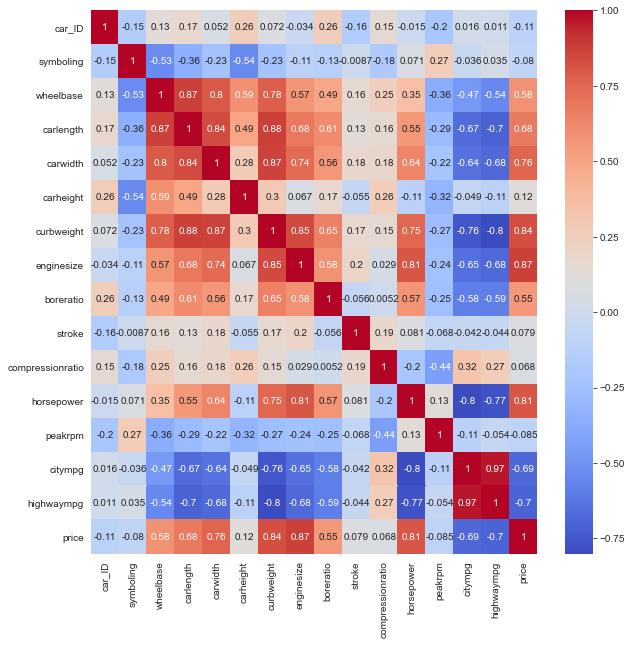

In [ ]:
corr=df[['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Company']].corr()
corr

fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.corr()['price'][:-1].sort_values(ascending=False)

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [ ]:
from scipy import stats
num_columns = df.select_dtypes(exclude='object').columns
for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {pearson_coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
    print('')

Car_id
Pearson Co-relation: -0.10909333948229952
P-Value: 0.11945179263824951
Correlation is Insignificant

Symboling
Pearson Co-relation: -0.07997822464270346
P-Value: 0.25431175848636967
Correlation is Insignificant

Wheelbase
Pearson Co-relation: 0.5778155982921502
P-Value: 1.1828204863377837e-19
Correlation is Significant

Carlength
Pearson Co-relation: 0.6829200156779621
P-Value: 1.678706624074708e-29
Correlation is Significant

Carwidth
Pearson Co-relation: 0.7593252997415116
P-Value: 9.627437876119569e-40
Correlation is Significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-Value: 0.08832832352275669
Correlation is Insignificant

Curbweight
Pearson Co-relation: 0.8353048793372966
P-Value: 1.2144448264032206e-54
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8741448025245118
P-Value: 1.3547637598647268e-65
Correlation is Significant

Boreratio
Pearson Co-relation: 0.5531732367984432
P-Value: 7.907922278250096e-18
Correlation is Significant

Stroke
Pearso

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Company'],
      dtype='object')

In [ ]:
drop = []
for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    if p_value > 0.05:
        drop.append(i)
        
drop

['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

In [ ]:
df.drop(drop, axis=1, inplace=True)
#df.drop('doornumber', axis=1, inplace=True)
df.head(2)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romeo
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romeo


In [ ]:
df.drop(columns=['CarName'],axis=1,inplace=True) #car name is not useful info
df.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romeo
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romeo


In [ ]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

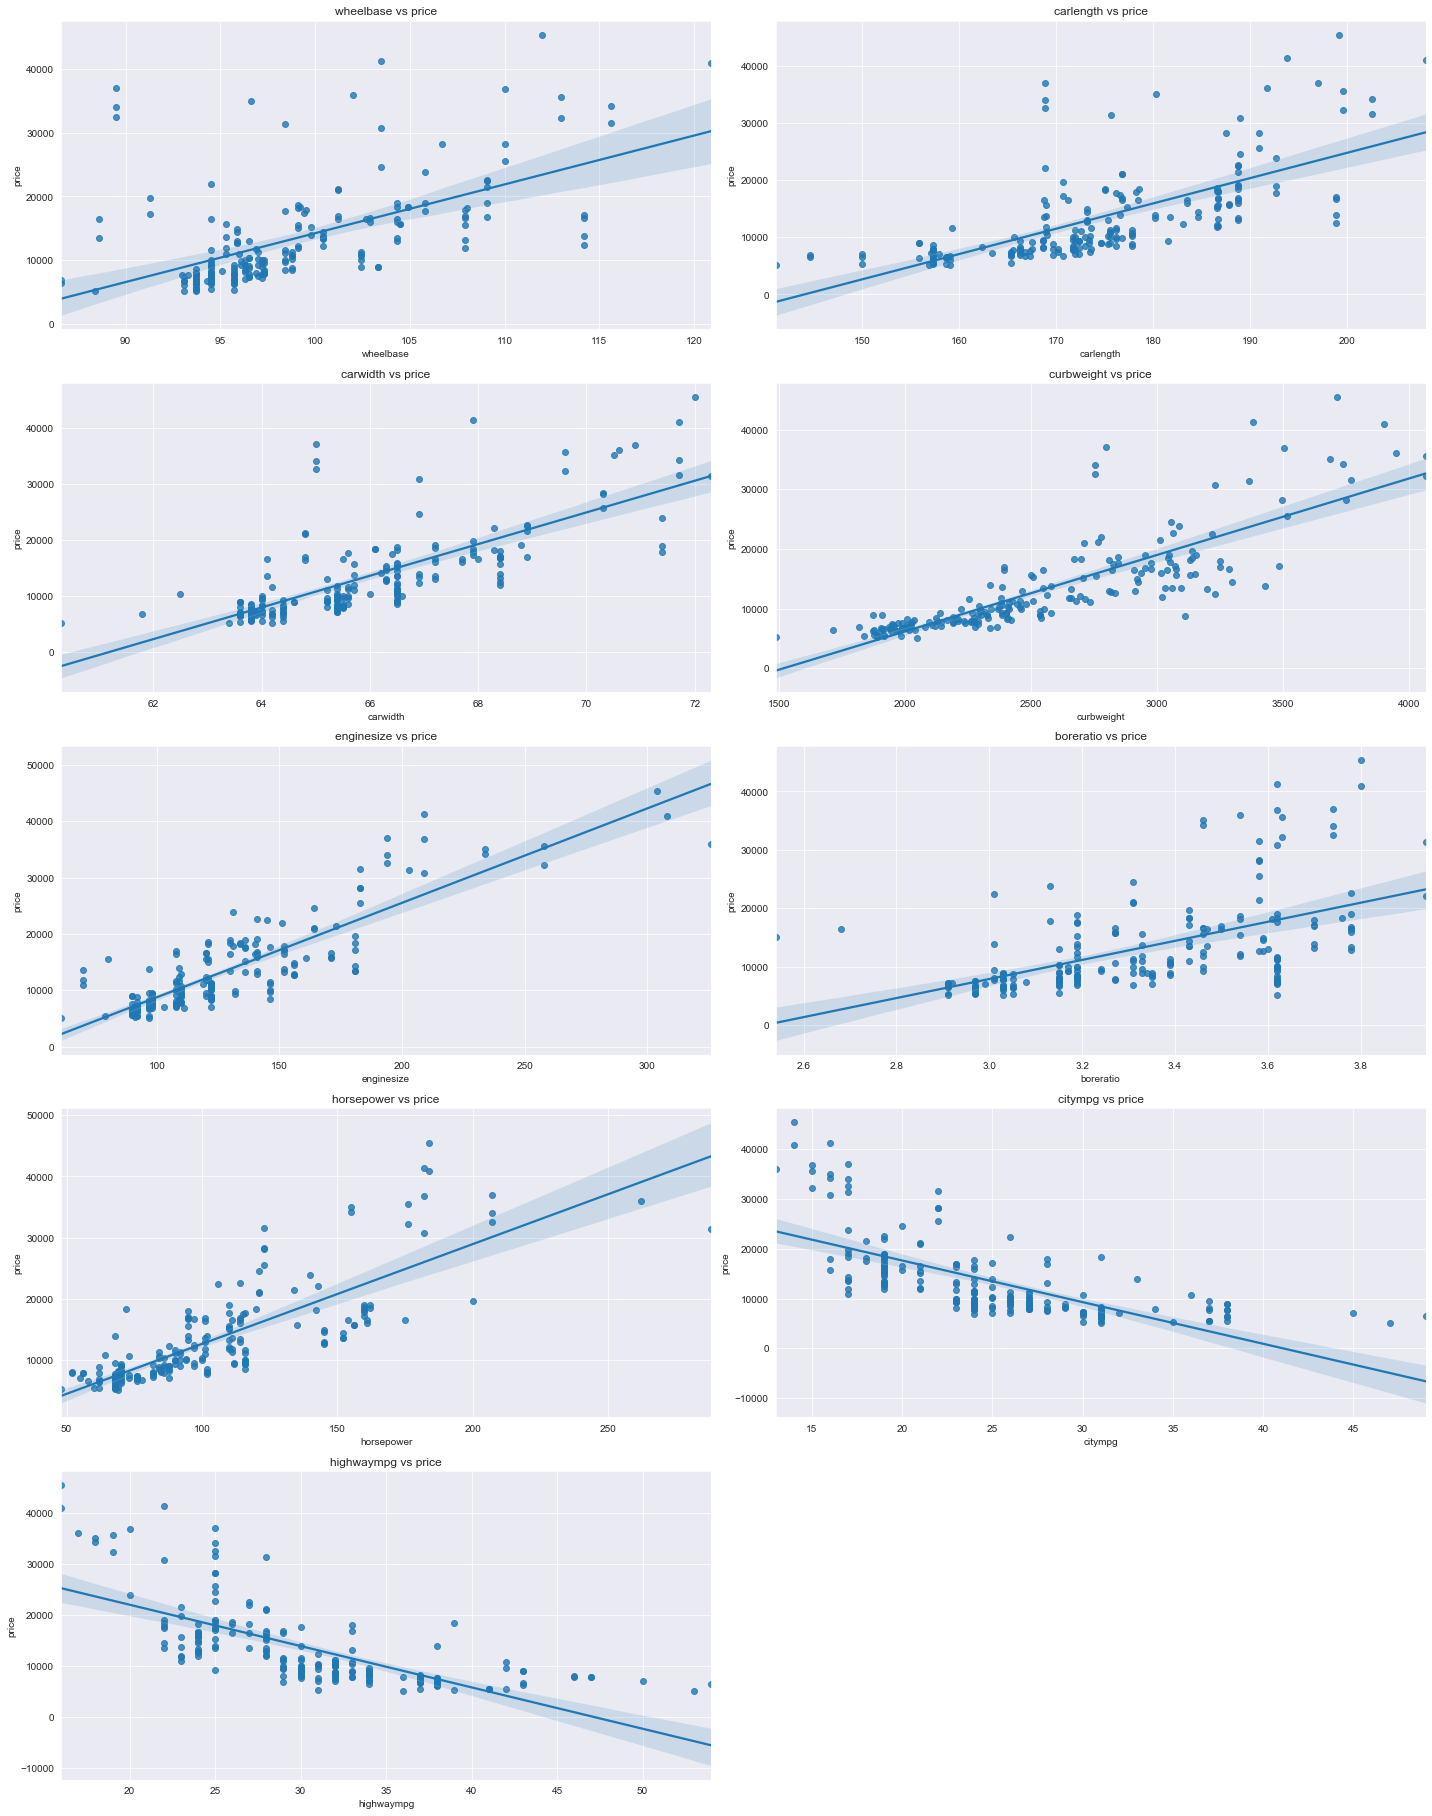

In [ ]:
cols= ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
'boreratio',  'horsepower', 'citympg', 'highwaympg' ]
def regplots(cols):
    
    for i in range(len(cols)):
        plt.subplot(7,2, i+1)
        plt.title(cols[i] + ' vs price')
        sns.regplot(x = eval('df' + '.' + cols[i]), y = df.price)
        
plt.figure(figsize=(20,35))
regplots(cols)
plt.tight_layout()

<AxesSubplot:xlabel='price', ylabel='Density'>

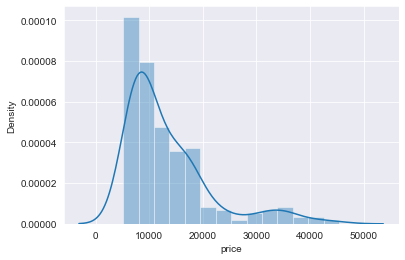

In [ ]:
sns.distplot(df.price)

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

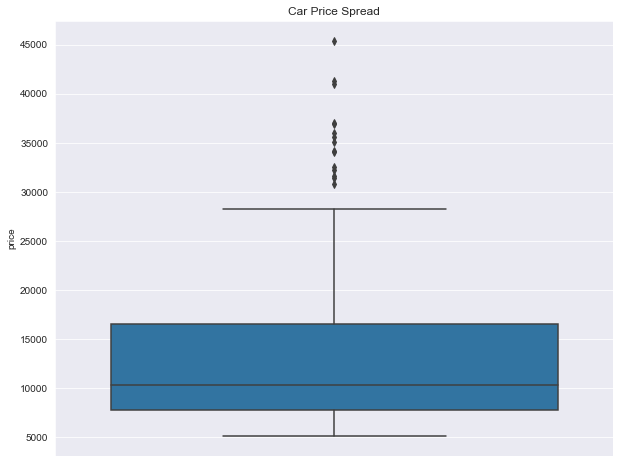

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

sns.pairplot(df)

In [ ]:
df.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romeo
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romeo
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romeo


In [ ]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginetype',df)
df = dummies('enginelocation',df)
df = dummies('cylindernumber',df)
df = dummies('doornumber',df)
df = dummies('fuelsystem',df)
df = dummies('Company',df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   boreratio   205 non-null    float64
 6   horsepower  205 non-null    int64  
 7   citympg     205 non-null    int64  
 8   highwaympg  205 non-null    int64  
 9   price       205 non-null    float64
 10  gas         205 non-null    uint8  
 11  turbo       205 non-null    uint8  
 12  hardtop     205 non-null    uint8  
 13  hatchback   205 non-null    uint8  
 14  sedan       205 non-null    uint8  
 15  wagon       205 non-null    uint8  
 16  fwd         205 non-null    uint8  
 17  rwd         205 non-null    uint8  
 18  dohcv       205 non-null    uint8  
 19  l           205 non-null    u

In [ ]:
df.shape

(205, 60)

In [ ]:
print(df.columns) 

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'rear', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'two', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')


In [ ]:
print(df.columns) 
cols=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', 
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'rear', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'two', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo']
cols_woprice=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'rear', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'two', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo']
num_cols=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
num_cols_woprice=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg']

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'rear', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'two', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')


In [ ]:
df.tail()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,...,0,0,0,0,0,0,0,0,0,1
204,109.1,188.8,68.9,3062,141,3.78,114,19,25,22625.0,...,0,0,0,0,0,0,0,0,0,1


# use scaler to normalize numeric columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train_data, test_data = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=42)

In [ ]:
y_train = train_data.pop('price')
X_train = train_data
y_test=test_data.pop('price')
X_test=test_data

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test)
rmse= (mean_squared_error(y_test,y_pred))**(1/2)
r2= r2_score(y_test,y_pred)

print(rmse)
print(r2)

52624181984.44016
-6.485708717720361e+22


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X= df.drop('price', axis=1)
y=df['price']

#X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 42)

In [ ]:
y_pred

array([ 5.75439453e-01,  3.85620117e-01,  1.25976562e-01,  1.87500000e-01,
        6.07177734e-01,  3.11279297e-02,  3.56445312e-02,  5.01708984e-02,
        6.76269531e-02,  6.34765625e-02,  1.77368164e-01,  2.72216797e-02,
        1.60156250e-01,  1.50512695e-01,  8.67187500e-01,  2.88085938e-02,
        4.14327069e+11,  2.20092773e-01,  9.80224609e-02,  8.36181641e-02,
        1.45629883e-01,  2.59887695e-01,  1.17553711e-01,  4.32128906e-02,
        3.55224609e-02,  5.97900391e-01,  2.18994141e-01,  2.68310547e-01,
        1.44042969e-02,  2.80029297e-01,  6.06445312e-01,  2.35595703e-02,
        3.93066406e-02,  3.35815430e-01,  5.29785156e-02,  6.76147461e-01,
        1.68823242e-01,  2.12890625e-01,  9.13085938e-02,  2.29370117e-01,
        5.71289062e-02,  1.41601562e-01,  2.21191406e-01,  2.33154297e-02,
        3.77197266e-02,  1.04614258e-01,  3.16162109e-02,  1.33056641e-02,
        2.82104492e-01, -5.47361760e+09,  2.77099609e-02,  3.05908203e-01,
        3.12500000e-02,  

In [ ]:
lr.coef_

array([ 3.85716135e-02, -7.56021580e-02,  2.66685070e-01,  2.83377710e-01,
        3.57847104e-01, -1.35047380e-01,  1.81694140e-01,  1.07927120e-01,
       -4.98938871e-02, -8.58919645e+11,  3.57177492e-02,  1.03652965e-02,
       -7.39637176e-02, -7.23340946e-02, -9.73918211e-02, -2.02679679e-02,
       -2.78269653e-02, -1.07756078e-01,  4.89424535e+11, -2.48890909e-02,
        1.76985622e+10, -4.93810422e-02, -1.05421743e+11, -1.76985622e+10,
       -4.36856811e-02,  5.72853388e-03, -3.72075039e-02, -7.50974654e+10,
       -8.93692587e-02,  1.05421743e+11, -1.08179754e-02,  3.12607192e-02,
        2.41505774e-02, -8.58919645e+11, -5.47361760e+09,  2.22169387e-02,
        4.95965549e-03,  5.54833199e-03,  1.72019901e-02,  1.87482812e-01,
        1.68476730e-01, -6.20114629e-02, -7.10907613e-02, -3.18722880e-02,
       -1.46056720e-02,  8.67349337e-02, -5.76762941e-02, -6.58048177e-02,
       -8.73623260e-02, -5.30223378e-02, -4.89424535e+11, -7.91077323e-02,
        1.40497739e-01, -

Text(0, 0.5, 'y_pred')

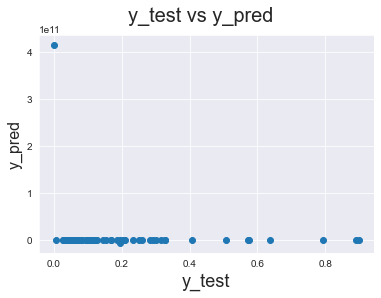

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

# model 2

In [ ]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.predict()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     67.26
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.41e-54
Time:                        21:04:22   Log-Likelihood:                 297.36
No. Observations:                 143   AIC:                            -486.7
Df Residuals:                      89   BIC:                            -326.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wheelbase      0.0386      0.082      0.469      0.6

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[num_cols_woprice]

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     79.06
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.28e-49
Time:                        21:04:22   Log-Likelihood:                 163.90
No. Observations:                 143   AIC:                            -307.8
Df Residuals:                     133   BIC:                            -278.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0720      0.060     -1.204      0.2

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-6.485708717720361e+22

In [ ]:
y_pred

array([ 5.75439453e-01,  3.85620117e-01,  1.25976562e-01,  1.87500000e-01,
        6.07177734e-01,  3.11279297e-02,  3.56445312e-02,  5.01708984e-02,
        6.76269531e-02,  6.34765625e-02,  1.77368164e-01,  2.72216797e-02,
        1.60156250e-01,  1.50512695e-01,  8.67187500e-01,  2.88085938e-02,
        4.14327069e+11,  2.20092773e-01,  9.80224609e-02,  8.36181641e-02,
        1.45629883e-01,  2.59887695e-01,  1.17553711e-01,  4.32128906e-02,
        3.55224609e-02,  5.97900391e-01,  2.18994141e-01,  2.68310547e-01,
        1.44042969e-02,  2.80029297e-01,  6.06445312e-01,  2.35595703e-02,
        3.93066406e-02,  3.35815430e-01,  5.29785156e-02,  6.76147461e-01,
        1.68823242e-01,  2.12890625e-01,  9.13085938e-02,  2.29370117e-01,
        5.71289062e-02,  1.41601562e-01,  2.21191406e-01,  2.33154297e-02,
        3.77197266e-02,  1.04614258e-01,  3.16162109e-02,  1.33056641e-02,
        2.82104492e-01, -5.47361760e+09,  2.77099609e-02,  3.05908203e-01,
        3.12500000e-02,  

In [ ]:
y_test

15     0.636562
9      0.316299
100    0.110000
132    0.167122
68     0.574202
         ...   
56     0.166998
128    0.792165
76     0.006728
144    0.102155
104    0.299911
Name: price, Length: 62, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
def eval_y_pred(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=True)

def execute_pipeline(train_df, test_df, target, cols_to_scale, scaler, text_data=False):
    X_train, X_test, y_train, y_test = train_test_split(train_df, target, random_state=0)
    if text_data:
        pipe = Pipeline([('count_vec', CountVectorizer(ngram_range=(1, 2))), ('tf_idf', TfidfTransformer(smooth_idf=False))])
        ct = ColumnTransformer([("scaler", scaler, cols_to_scale),
                                ("tf_idf", pipe, 'text_final_joined')], 
                               remainder='passthrough' )
    else:
        ct = ColumnTransformer([("scaler", scaler, cols_to_scale)],
                               remainder='passthrough')
    ct.fit(X_train)
    X_train_sparse = ct.transform(X_train)
    X_test_sparse = ct.transform(X_test)
    test_df_sparse = ct.transform(test_df)
    print(X_train_sparse.shape, X_test_sparse.shape, test_df_sparse.shape)
    list_reg_models = [LinearRegression(), Ridge(alpha=0.5), AdaBoostRegressor(), GradientBoostingRegressor()]
    for each_reg_model in list_reg_models:
        print("Fitting ", type(each_reg_model).__name__)
        each_reg_model.fit(X_train_sparse, y_train)
        y_pred = each_reg_model.predict(X_test_sparse)
        rmse = eval_y_pred(y_test, y_pred)
        print("RMSE: ", rmse)
        # Entry each model at shape[0] == index + 1      
        df_store_results.loc[df_store_results.shape[0]] = [type(each_reg_model).__name__,
                                                           train_df.columns,
                                                           type(scaler).__name__,
                                                           cols_to_scale,
                                                           rmse]

In [ ]:
# Trying out different scaling

from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer, PowerTransformer

''' Testing CV'''
alphas = [0.1, 0.5, 1, 5, 10]
cv = None # for Leave one out

scalers = [StandardScaler(), RobustScaler(), MinMaxScaler(), PowerTransformer(), # default method - yeo-johnson
           QuantileTransformer(n_quantiles=10, random_state=0), MaxAbsScaler()]

for each_scaler in scalers:
    print(type(each_scaler).__name__)
    execute_pipeline(train_data[cols_woprice],
                     test_data[cols_woprice], 
                     target, cols_woprice, each_scaler,alphas, cv, text_data=False)

StandardScaler


TypeError: execute_pipeline() got multiple values for argument 'text_data'

In [ ]:
cols_woprice

# leave-one-out cross-validation

In [ ]:
# Simple leave-one-out cross-validation implementation with Pandas DataFrames

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Print the size of the data:
n_rows, n_cols = df.shape
print("There are {0} rows of data".format(n_rows))
print("There are {0} columns of data".format(n_cols))

lm = LinearRegression(fit_intercept = True)

train_errors = []
test_errors = []

# For each row in the data:
for i in range(n_rows):
 
    lm.fit(X_train,y_train)
    
    y_pred= lr.predict(X_test)
    y_pred_train = lm.predict(X_train)
    train_error = mean_squared_error(y_pred_train,y_train)
    train_errors.append(train_error)
    
    y_pred = lm.predict(X_test)
    test_error = mean_squared_error(y_pred,y_test)
    test_errors.append(test_error)
    #print("The training error was:", train_error)
    #print("The test error was:", test_error)

print("The mean train error was:", sum(train_errors)/len(train_errors))
print("The mean test error was:", sum(test_errors)/len(test_errors))


# k-fold cross-validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

lm = LinearRegression(fit_intercept=True)

data=df.values
X, y = data[:, :-1], data[:, -1]

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print('MSE is:', mse)
r2 = r2_score(y_test, y_pred)
print("R^2 score is:", r2)

errors = []

rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=2652124)
for train_index, test_index in rkf.split(X=data[:, :-1], y=data[:, -1]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    errors.append(mean_squared_error(y_pred,y_test))
    
print(sum(errors)/len(errors))    

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R^2 score ")
print(r2)

# The Leave-One-Out Cross-Validation, or LOOCV

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


data=df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
cv = LeaveOneOut()
scores = cross_val_score(lm, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
np.random.seed(0)
train_data, test_data = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=42, shuffle=True)

In [ ]:
X_train.shape

In [ ]:
train_data.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_test.shape

In [ ]:
df[num_cols_woprice].shape

In [ ]:
X.shape